# **LOAN PREDICTION BASED ON CUSTOMER RECORDS**

# Import Libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt             
import pandas as pd
import seaborn as sns
import warnings
import plotly.express as ex
warnings.filterwarnings('ignore')
%matplotlib inline

# Import DataSets

In [7]:
# used for training models
train_data=pd.read_csv('C:/Users/Lenovo/OneDrive/Desktop/Loan ML/Data/Loan train data.csv') 

In [8]:
# used for predictions
customer_data=pd.read_csv('C:/Users/Lenovo/OneDrive/Desktop/Loan ML/Data/New Customer.csv')

# Overview of Both Datasets

* Train Dataset Overview

In [9]:
train_data.head(7)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


* Customer data set Overview

In [12]:
customer_data.head(7)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban


In [13]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [14]:
customer_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


# **DATA PREPROCESSING**

 # Handling Nulls on Train Dataset

In [15]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
train_data['Gender'].fillna(value=train_data['Gender'].mode()[0],inplace=True)
train_data['Loan_ID'].fillna(value=train_data['Loan_ID'].mode()[0],inplace=True)
train_data['Married'].fillna(value=train_data['Married'].mode()[0],inplace=True)
train_data['Dependents'].fillna(value=train_data['Dependents'].mode()[0],inplace=True)
train_data['Self_Employed'].fillna(value=train_data['Self_Employed'].mode()[0],inplace=True)
train_data['Credit_History'].fillna(value=train_data['Credit_History'].mode()[0],inplace=True)

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

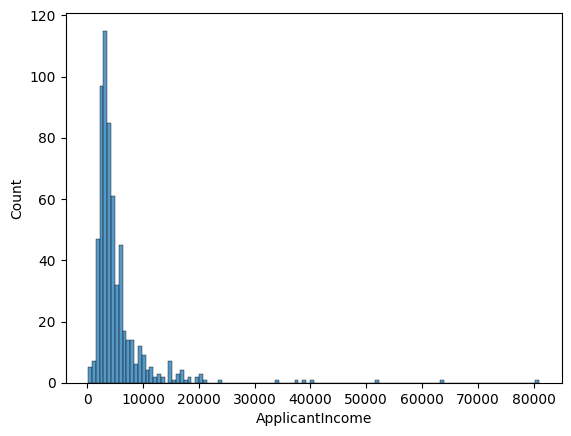

In [17]:
sns.histplot(train_data['ApplicantIncome'])

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

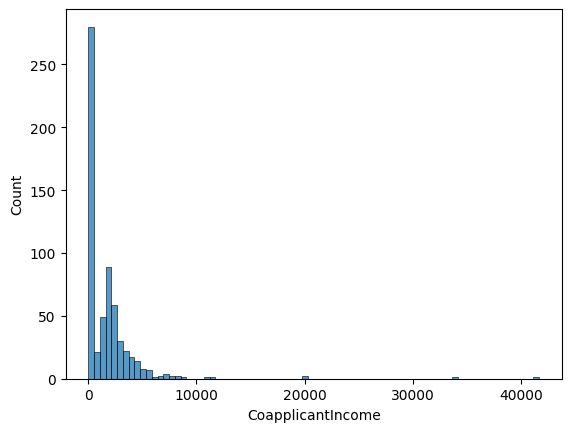

In [18]:
sns.histplot(train_data['CoapplicantIncome'])

<Axes: xlabel='LoanAmount', ylabel='Count'>

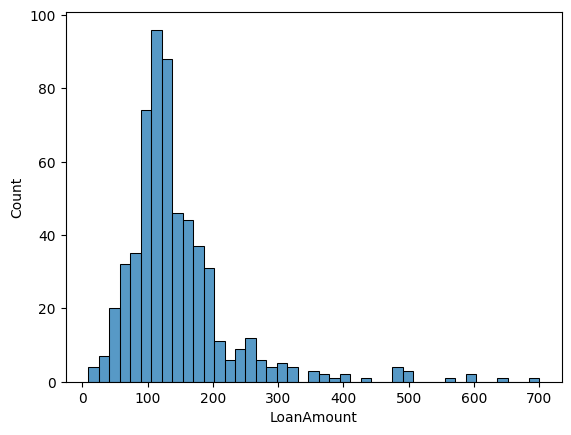

In [19]:
sns.histplot(train_data['LoanAmount'])

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

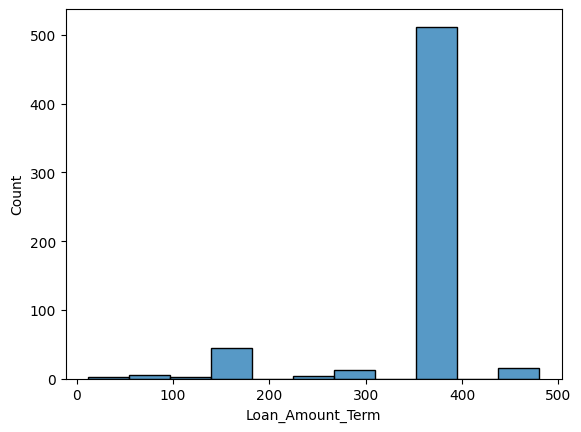

In [20]:
sns.histplot(train_data['Loan_Amount_Term'])

In [21]:
train_data['LoanAmount'].fillna(value=train_data['LoanAmount'].median(),inplace=True)
train_data['Loan_Amount_Term'].fillna(value=train_data['Loan_Amount_Term'].median(),inplace=True)
train_data['ApplicantIncome'].fillna(value=train_data['ApplicantIncome'].median(),inplace=True)
train_data['CoapplicantIncome'].fillna(value=train_data['CoapplicantIncome'].median(),inplace=True)

In [22]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

* Handling Outliers

<Axes: xlabel='Married', ylabel='LoanAmount'>

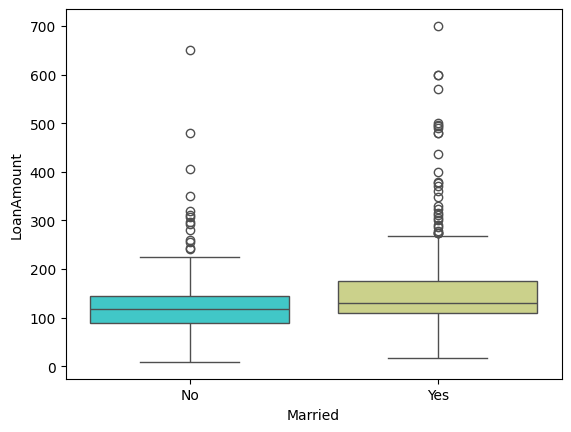

In [23]:
sns.boxplot(x="Married", y="LoanAmount", data=train_data,palette='rainbow')

<Axes: xlabel='Dependents', ylabel='LoanAmount'>

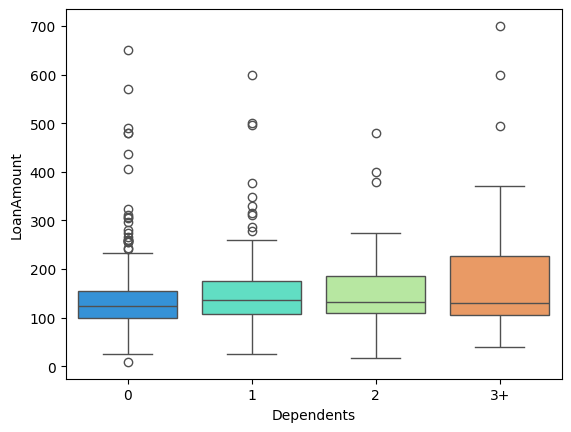

In [24]:
sns.boxplot(x="Dependents", y="LoanAmount", data=train_data,palette='rainbow')

<Axes: xlabel='Self_Employed', ylabel='LoanAmount'>

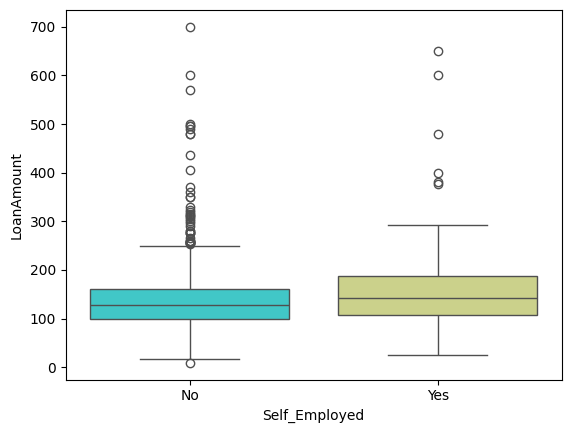

In [25]:
sns.boxplot(x="Self_Employed", y="LoanAmount", data=train_data,palette='rainbow')

* Calculating how much outliers there is.

In [26]:
def outliers(data):

    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    IQR = Q3 - Q1
    
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    lower_outlier=train_data[data<lower_whisker]
    upper_outlier=train_data[data>upper_whisker]

    outliers=len(lower_outlier)+len(upper_outlier)

    return str(outliers)
 
print("Total Outliers in ApplicantIncome = "+outliers(train_data['ApplicantIncome']))
print("Total Outliers in CoapplicantIncome = "+outliers(train_data['CoapplicantIncome']))
print("Total Outliers in LoanAmount = "+outliers(train_data['LoanAmount']))
print("Total Outliers in Loan_Amount_Term = "+outliers(train_data['Loan_Amount_Term']))
    

Total Outliers in ApplicantIncome = 50
Total Outliers in CoapplicantIncome = 18
Total Outliers in LoanAmount = 41
Total Outliers in Loan_Amount_Term = 88


In [27]:
def replace_outliers_with_whiskers(data):

    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    IQR = Q3 - Q1
    
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    

    cleaned_data = np.where(data < lower_whisker, lower_whisker, data)
    cleaned_data = np.where(data > upper_whisker, upper_whisker, cleaned_data)
    return cleaned_data

train_data['ApplicantIncome']= replace_outliers_with_whiskers(train_data['ApplicantIncome'])
train_data['CoapplicantIncome']= replace_outliers_with_whiskers(train_data['CoapplicantIncome'])
train_data['LoanAmount']= replace_outliers_with_whiskers(train_data['LoanAmount'])
train_data['Loan_Amount_Term']= replace_outliers_with_whiskers(train_data['Loan_Amount_Term'])


Now check again

In [28]:
print("Total Outliers in ApplicantIncome = "+outliers(train_data['ApplicantIncome']))
print("Total Outliers in CoapplicantIncome = "+outliers(train_data['CoapplicantIncome']))
print("Total Outliers in LoanAmount = "+outliers(train_data['LoanAmount']))
print("Total Outliers in Loan_Amount_Term = "+outliers(train_data['Loan_Amount_Term']))

Total Outliers in ApplicantIncome = 0
Total Outliers in CoapplicantIncome = 0
Total Outliers in LoanAmount = 0
Total Outliers in Loan_Amount_Term = 0


<Axes: xlabel='Married', ylabel='LoanAmount'>

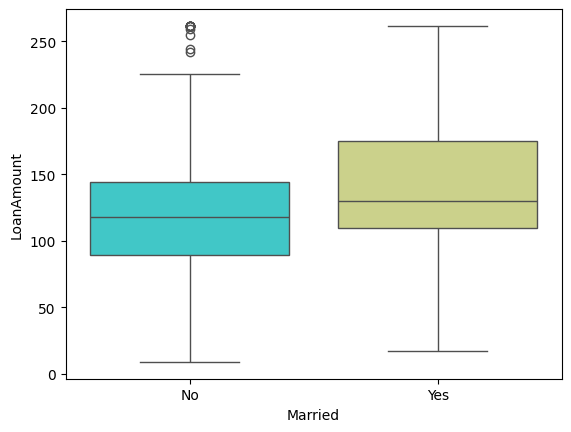

In [29]:
sns.boxplot(x="Married", y="LoanAmount", data=train_data,palette='rainbow')

<Axes: xlabel='Dependents', ylabel='LoanAmount'>

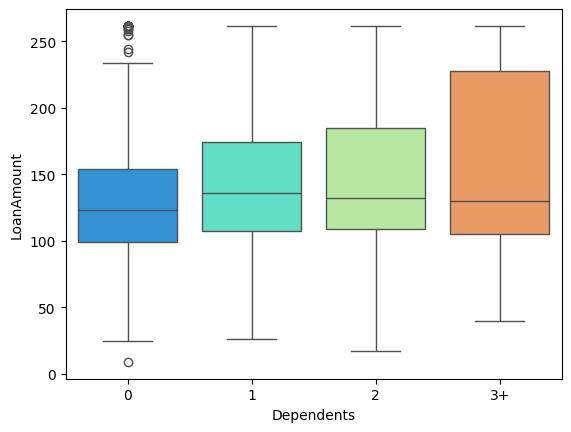

In [30]:
sns.boxplot(x="Dependents", y="LoanAmount", data=train_data,palette='rainbow')

<Axes: xlabel='Self_Employed', ylabel='LoanAmount'>

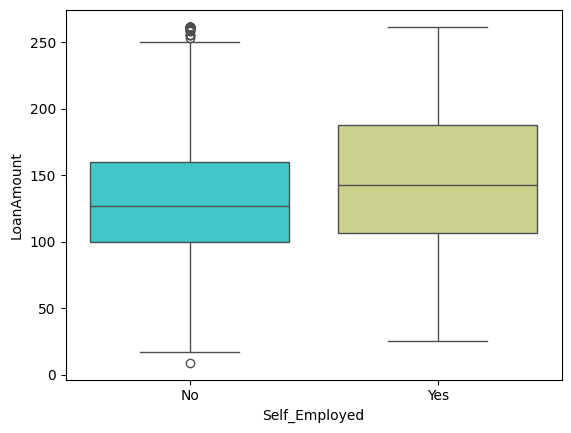

In [31]:
sns.boxplot(x="Self_Employed", y="LoanAmount", data=train_data,palette='rainbow')

# Handling Nulls on Customer Dataset

In [32]:
customer_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [33]:
customer_data['Gender'].fillna(value=customer_data['Gender'].mode()[0],inplace=True)
customer_data['Dependents'].fillna(value=customer_data['Dependents'].mode()[0],inplace=True)
customer_data['Self_Employed'].fillna(value=customer_data['Self_Employed'].mode()[0],inplace=True)
customer_data['Credit_History'].fillna(value=customer_data['Credit_History'].mode()[0],inplace=True)

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

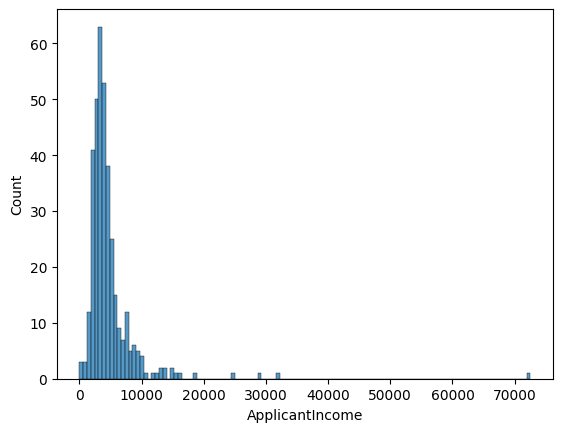

In [34]:
sns.histplot(customer_data['ApplicantIncome'])

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

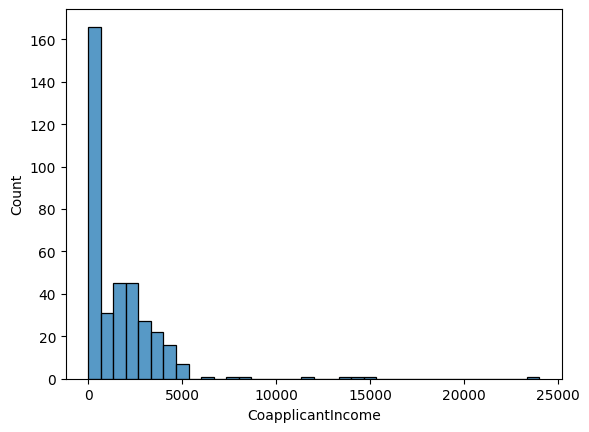

In [35]:
sns.histplot(customer_data['CoapplicantIncome'])

<Axes: xlabel='LoanAmount', ylabel='Count'>

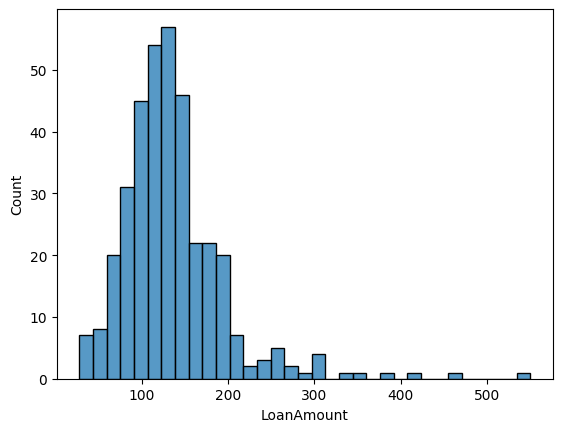

In [36]:
sns.histplot(customer_data['LoanAmount'])

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

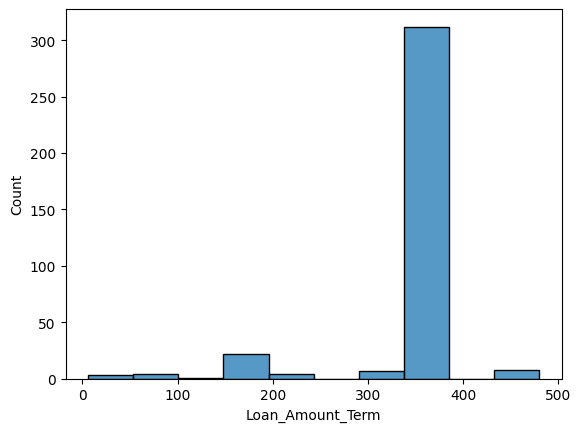

In [37]:
sns.histplot(customer_data['Loan_Amount_Term'])

In [38]:
customer_data['LoanAmount'].fillna(value=customer_data['LoanAmount'].median(),inplace=True)
customer_data['Loan_Amount_Term'].fillna(value=customer_data['Loan_Amount_Term'].median(),inplace=True)
customer_data['ApplicantIncome'].fillna(value=customer_data['ApplicantIncome'].median(),inplace=True)
customer_data['CoapplicantIncome'].fillna(value=customer_data['CoapplicantIncome'].median(),inplace=True)

In [39]:
customer_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<Axes: xlabel='Married', ylabel='LoanAmount'>

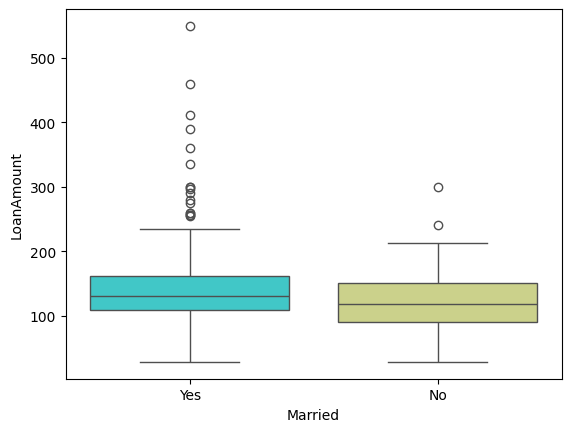

In [40]:
sns.boxplot(x="Married", y="LoanAmount", data=customer_data,palette='rainbow')

<Axes: xlabel='Dependents', ylabel='LoanAmount'>

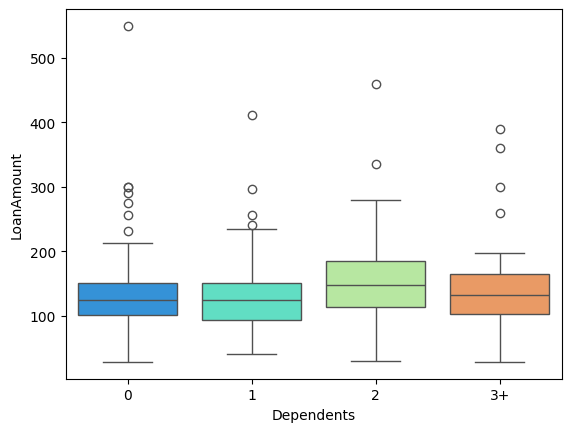

In [41]:
sns.boxplot(x="Dependents", y="LoanAmount", data=customer_data,palette='rainbow')

<Axes: xlabel='Self_Employed', ylabel='LoanAmount'>

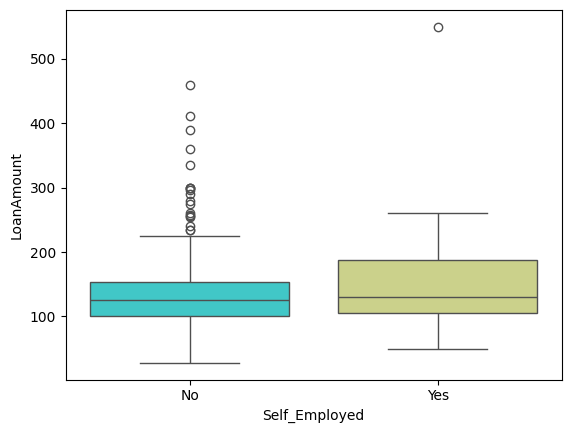

In [42]:
sns.boxplot(x="Self_Employed", y="LoanAmount", data=customer_data,palette='rainbow')

In [43]:
customer_data['LoanAmount']= replace_outliers_with_whiskers(customer_data['LoanAmount'])
customer_data['ApplicantIncome']= replace_outliers_with_whiskers(customer_data['ApplicantIncome'])
customer_data['CoapplicantIncome']= replace_outliers_with_whiskers(customer_data['CoapplicantIncome'])
customer_data['LoanAmount']= replace_outliers_with_whiskers(customer_data['LoanAmount'])
customer_data['Loan_Amount_Term']= replace_outliers_with_whiskers(customer_data['Loan_Amount_Term'])

# Handling Outliers

<Axes: xlabel='Married', ylabel='LoanAmount'>

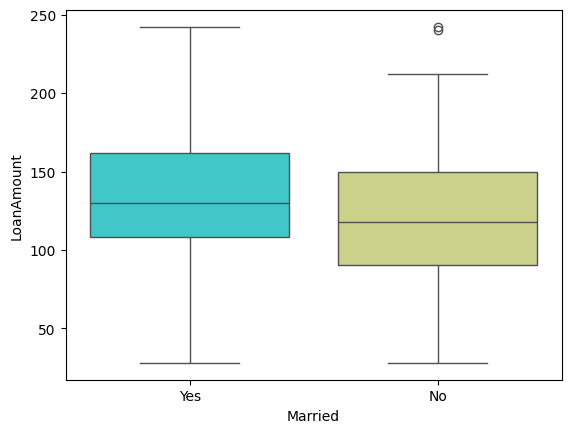

In [44]:
sns.boxplot(x="Married", y="LoanAmount", data=customer_data,palette='rainbow')

<Axes: xlabel='Dependents', ylabel='LoanAmount'>

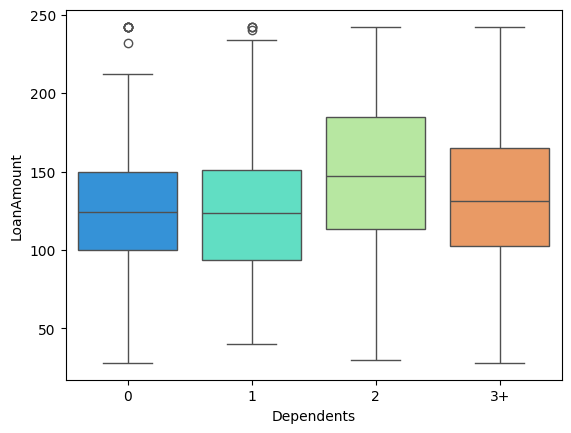

In [45]:
sns.boxplot(x="Dependents", y="LoanAmount", data=customer_data,palette='rainbow')

<Axes: xlabel='Self_Employed', ylabel='LoanAmount'>

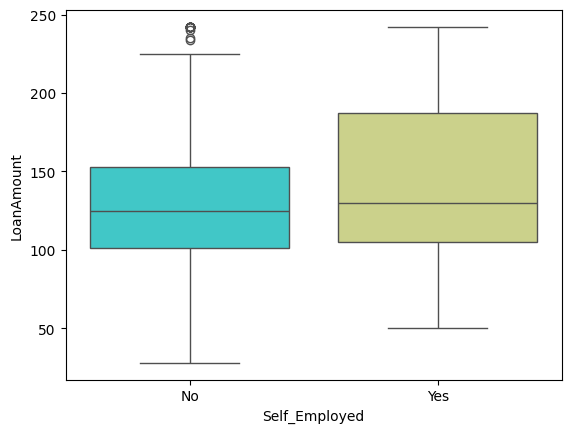

In [46]:
sns.boxplot(x="Self_Employed", y="LoanAmount", data=customer_data,palette='rainbow')

In [47]:
customer_data['LoanAmount']= replace_outliers_with_whiskers(customer_data['LoanAmount'])
customer_data['ApplicantIncome']= replace_outliers_with_whiskers(customer_data['ApplicantIncome'])
customer_data['CoapplicantIncome']= replace_outliers_with_whiskers(customer_data['CoapplicantIncome'])
customer_data['LoanAmount']= replace_outliers_with_whiskers(customer_data['LoanAmount'])
customer_data['Loan_Amount_Term']= replace_outliers_with_whiskers(customer_data['Loan_Amount_Term'])

Now we check again

<Axes: xlabel='Married', ylabel='LoanAmount'>

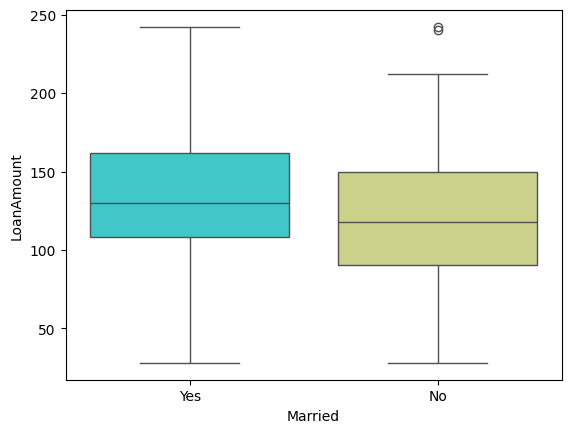

In [48]:
sns.boxplot(x="Married", y="LoanAmount", data=customer_data,palette='rainbow')

<Axes: xlabel='Dependents', ylabel='LoanAmount'>

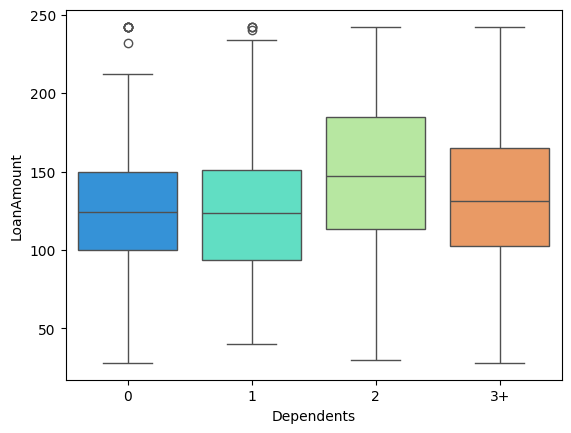

In [49]:
sns.boxplot(x="Dependents", y="LoanAmount", data=customer_data,palette='rainbow')

<Axes: xlabel='Self_Employed', ylabel='LoanAmount'>

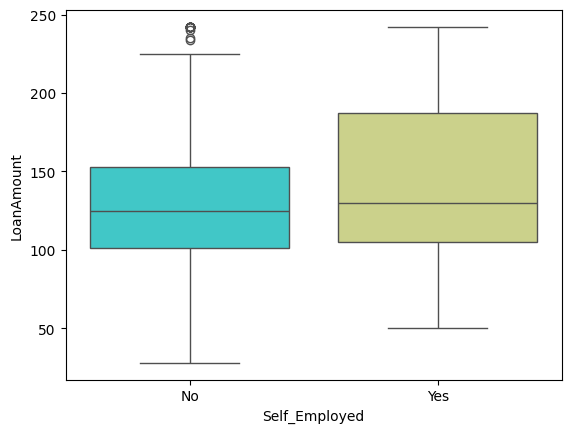

In [50]:
sns.boxplot(x="Self_Employed", y="LoanAmount", data=customer_data,palette='rainbow')

## **Observations and Feature Analysis**

In [51]:
ex.pie(train_data,names='Loan_Status')

In [52]:
ex.pie(train_data,names='Gender')

In [53]:
ex.pie(train_data,names='Married')

In [54]:
ex.pie(train_data,names='Self_Employed')

In [55]:
ex.pie(train_data,names='Property_Area')

In [56]:
ex.pie(train_data,names='Dependents')

<Axes: xlabel='Gender', ylabel='count'>

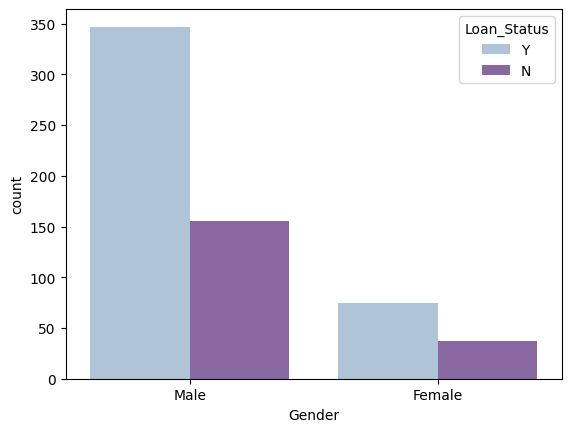

In [57]:
sns.countplot(x='Gender', data=train_data,hue='Loan_Status', palette='BuPu')

<Axes: xlabel='Married', ylabel='count'>

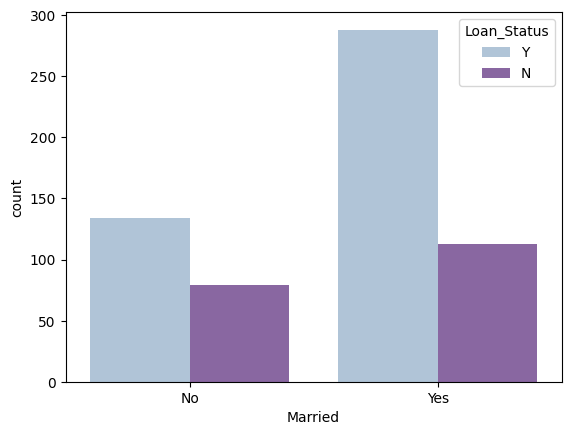

In [58]:
sns.countplot(x='Married', data=train_data,hue='Loan_Status', palette='BuPu')

<Axes: xlabel='Education', ylabel='count'>

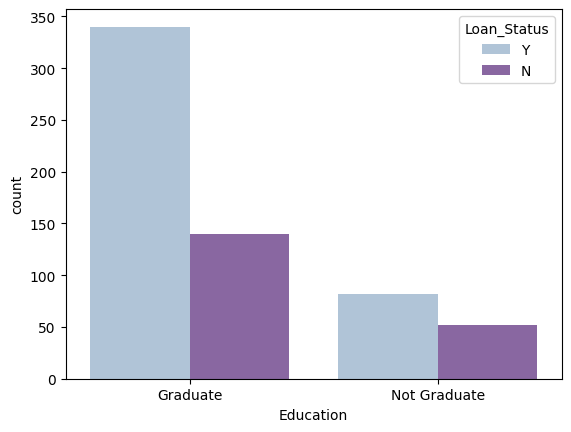

In [59]:
sns.countplot(x='Education', data=train_data,hue='Loan_Status',palette='BuPu')

<Axes: xlabel='Dependents', ylabel='count'>

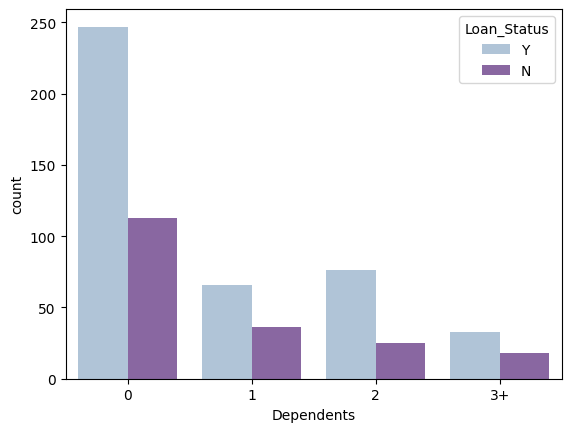

In [60]:
sns.countplot(x='Dependents', data=train_data,hue='Loan_Status',palette='BuPu')

<Axes: xlabel='Self_Employed', ylabel='count'>

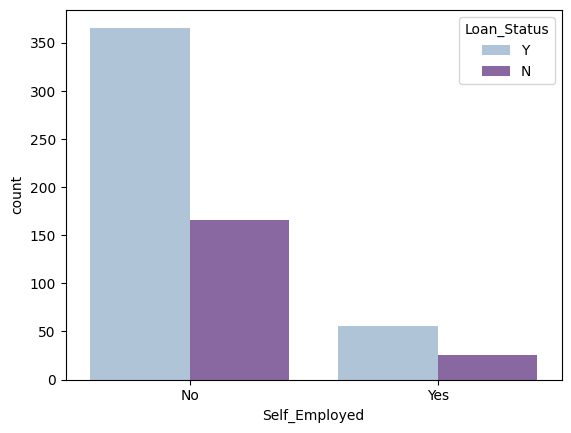

In [61]:
sns.countplot(x='Self_Employed', data=train_data,hue='Loan_Status', palette='BuPu')

<Axes: xlabel='Property_Area', ylabel='count'>

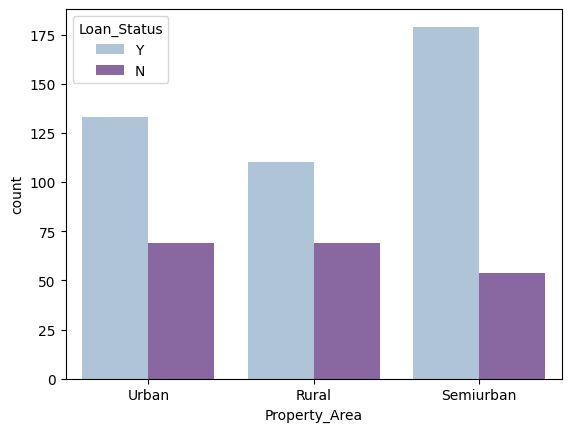

In [62]:
sns.countplot(x='Property_Area', data=train_data,hue='Loan_Status', palette='BuPu')


# More Cleansing of Both Datasets

## Encoding Categorical Data

In [63]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [64]:
train_data['Loan_ID'] = label_encoder.fit_transform(train_data['Loan_ID'] )
train_data['Gender'] = label_encoder.fit_transform(train_data['Gender'] )
train_data['Married'] = label_encoder.fit_transform(train_data['Married'] )
train_data['Self_Employed'] = label_encoder.fit_transform(train_data['Self_Employed'] )
train_data['Credit_History'] = label_encoder.fit_transform(train_data['Credit_History'] )
train_data['Education'] = label_encoder.fit_transform(train_data['Education'] )
train_data['Dependents'] = label_encoder.fit_transform(train_data['Dependents'] )
train_data['Loan_Status'] = label_encoder.fit_transform(train_data['Loan_Status'] )
train_data['Property_Area'] = label_encoder.fit_transform(train_data['Property_Area'] )
numeric_data = train_data.select_dtypes(include=['number'])

In [65]:
customer_data['Loan_ID'] = label_encoder.fit_transform(customer_data['Loan_ID'])
customer_data['Gender'] = label_encoder.fit_transform(customer_data['Gender'] )
customer_data['Married'] = label_encoder.fit_transform(customer_data['Married'] )
customer_data['Dependents'] = label_encoder.fit_transform(customer_data['Dependents'])
customer_data['Self_Employed'] = label_encoder.fit_transform(customer_data['Self_Employed'] )
customer_data['Credit_History'] = label_encoder.fit_transform(customer_data['Credit_History'] )
customer_data['Education'] = label_encoder.fit_transform(customer_data['Education'] )
customer_data['Property_Area'] = label_encoder.fit_transform(customer_data['Property_Area'] )
numeric = customer_data.select_dtypes(include=['number'])

* Removing unrelated columns

In [66]:
train_data.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.020860,-0.030267,0.034713,NaN,-0.030603,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.065040,0.192438,0.143426,NaN,0.009170,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.022480,0.221217,0.177417,NaN,0.010938,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.111565,-0.031510,0.164515,NaN,-0.040160,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.203087,-0.049895,-0.176194,NaN,-0.073658,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.237122,-0.032784,0.114297,NaN,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.020860,0.065040,0.022480,0.111565,-0.203087,0.237122,1.000000,-0.228956,0.557953,NaN,0.035345,-0.028661,-0.000442
CoapplicantIncome,-0.030267,0.192438,0.221217,-0.031510,-0.049895,-0.032784,-0.228956,1.000000,0.265021,NaN,-0.001710,-0.074451,0.011983
LoanAmount,0.034713,0.143426,0.177417,0.164515,-0.176194,0.114297,0.557953,0.265021,1.000000,NaN,0.004320,-0.075035,-0.047262
Loan_Amount_Term,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
train_data.drop(columns=['Loan_Amount_Term'],inplace=True)
customer_data.drop(columns=['Loan_Amount_Term'],inplace=True)

## Feature Scaling

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()


X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(train_data.iloc[:,:-1].values, train_data.iloc[:,-1].values, test_size = 0.25, random_state = 41)
X_train_scaled=Sc.fit_transform(X_train_scaled)
X_test_scaled=Sc.transform(X_test_scaled)

customer_data_scaled=customer_data
customer_data_scaled=Sc.transform(customer_data_scaled)

# **Implementing Classification Models(Logistic Regression, KNN, RandomForest, Xgboost)**

## Import Libraries

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Split Data

In [70]:
X_train=X_train_scaled
X_test=X_test_scaled
y_train= y_train_scaled
y_test= y_test_scaled

X_final_Test=customer_data_scaled

## *Logistic Regression*

In [71]:
logic_reg = LogisticRegression(random_state = 0)

In [72]:
logic_reg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [73]:
y_pred_logic_reg = logic_reg.predict(X_test)

* Performance Evaluation

In [74]:
cm_logic_red = confusion_matrix(y_test, y_pred_logic_reg)
cm_logic_red

array([[ 21,  32],
       [  1, 100]])

In [75]:
cr_logic_reg=classification_report(y_test, y_pred_logic_reg)
print(cr_logic_reg)

              precision    recall  f1-score   support

           0       0.95      0.40      0.56        53
           1       0.76      0.99      0.86       101

    accuracy                           0.79       154
   macro avg       0.86      0.69      0.71       154
weighted avg       0.83      0.79      0.76       154



## *K-Nearest Neighbors*

In [76]:
knn_model = KNeighborsClassifier()

* Using GridSearch to fiind the best possible K value

In [77]:
knn_param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19]} 
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5, scoring='accuracy')

In [78]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

* Performance Evaluation

In [79]:
y_pred_knn=knn_model.predict(X_test)

print(f"Testing score accuracy = {accuracy_score(y_test,y_pred_knn)}")

Testing score accuracy = 0.7532467532467533


In [80]:
cr_knn=classification_report(y_test, y_pred_knn)
print(cr_knn)

              precision    recall  f1-score   support

           0       0.78      0.40      0.53        53
           1       0.75      0.94      0.83       101

    accuracy                           0.75       154
   macro avg       0.76      0.67      0.68       154
weighted avg       0.76      0.75      0.73       154



# *Random Forest Classifier*

In [81]:
model = RandomForestClassifier(n_estimators=100, random_state=42)  # For classification
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [82]:
y_pred = model.predict(X_test)

* Performance Evaluation

In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7922077922077922
[[23 30]
 [ 2 99]]
              precision    recall  f1-score   support

           0       0.92      0.43      0.59        53
           1       0.77      0.98      0.86       101

    accuracy                           0.79       154
   macro avg       0.84      0.71      0.73       154
weighted avg       0.82      0.79      0.77       154



# *XGB Classifier*

In [84]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [85]:
y_pred = model.predict(X_test_scaled)

* Performance Evaluation

In [86]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.73      0.45      0.56        53
           1       0.76      0.91      0.83       101

    accuracy                           0.75       154
   macro avg       0.74      0.68      0.69       154
weighted avg       0.75      0.75      0.74       154



In our analysis, it is evident that the logistic regression model and Random Forest Classifier results has higher level of accuracy(0.79) compared to K-Nearest Neighbors model, which achieved 0.75 and XGBClassifier has accuracy of 0.75.This finding underscores the superior predictive performance of the logistic regression approach over KNN, RandomForest Classifier, XGB Classifier in our study.

# Predicting Loan Status for New Customers

In [87]:
y_Final_pred_logic_reg = logic_reg.predict(X_final_Test)

In [88]:
customer_data['Loan_Status']=y_Final_pred_logic_reg
customer_data['Loan_Status'].replace(1, 'Y', inplace=True)
customer_data['Loan_Status'].replace(0, 'N', inplace=True)
customer_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,0,1,1,0,0,0,5720.0,0.0,110.0,1,2,Y
1,1,1,1,1,0,0,3076.0,1500.0,126.0,1,2,Y
2,2,1,1,2,0,0,5000.0,1800.0,208.0,1,2,Y
3,3,1,1,2,0,0,2340.0,2546.0,100.0,1,2,Y
4,4,1,0,0,1,0,3276.0,0.0,78.0,1,2,Y


# Analysis of New Customer Data:

<Axes: xlabel='Married', ylabel='count'>

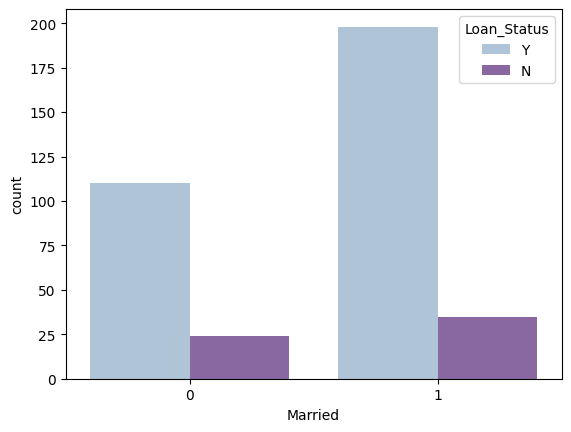

In [89]:
sns.countplot(x='Married', data=customer_data,hue='Loan_Status', palette='BuPu')

<Axes: xlabel='Self_Employed', ylabel='count'>

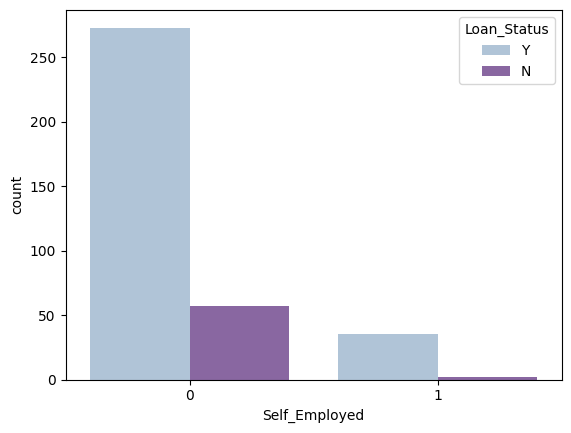

In [90]:
sns.countplot(x='Self_Employed', data=customer_data,hue='Loan_Status', palette='BuPu')

In [91]:
ex.pie(customer_data,names='Loan_Status')

* Calculationg the percentage of married people in semiurban areas who obtained the loan

In [92]:
filtered_Customer_data = customer_data[customer_data['Married']==1]
filtered_Customer_data = filtered_Customer_data[filtered_Customer_data['Property_Area']==1]
filtered_Customer_data = filtered_Customer_data[filtered_Customer_data['Loan_Status']=='Y']
filtered_Customer_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
11,11,1,1,1,0,0,2185.0,1516.0,162.0,1,1,Y
17,17,1,1,3,0,0,3786.0,333.0,126.0,1,1,Y
28,28,1,1,0,0,0,3772.0,833.0,57.0,1,1,Y
42,42,1,1,0,1,0,1750.0,2024.0,90.0,1,1,Y
49,49,1,1,3,1,1,8000.0,250.0,187.0,1,1,Y


In [93]:
filtered_Customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, 11 to 361
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            57 non-null     int64  
 1   Gender             57 non-null     int64  
 2   Married            57 non-null     int64  
 3   Dependents         57 non-null     int64  
 4   Education          57 non-null     int64  
 5   Self_Employed      57 non-null     int64  
 6   ApplicantIncome    57 non-null     float64
 7   CoapplicantIncome  57 non-null     float64
 8   LoanAmount         57 non-null     float64
 9   Credit_History     57 non-null     int64  
 10  Property_Area      57 non-null     int64  
 11  Loan_Status        57 non-null     object 
dtypes: float64(3), int64(8), object(1)
memory usage: 5.8+ KB


In [94]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    int64  
 1   Gender             367 non-null    int64  
 2   Married            367 non-null    int64  
 3   Dependents         367 non-null    int64  
 4   Education          367 non-null    int64  
 5   Self_Employed      367 non-null    int64  
 6   ApplicantIncome    367 non-null    float64
 7   CoapplicantIncome  367 non-null    float64
 8   LoanAmount         367 non-null    float64
 9   Credit_History     367 non-null    int64  
 10  Property_Area      367 non-null    int64  
 11  Loan_Status        367 non-null    object 
dtypes: float64(3), int64(8), object(1)
memory usage: 34.5+ KB


In [95]:
customer_data= customer_data.reindex(columns=train_data.columns, fill_value=0)


# Calculating the Loan Approval of a person

In [96]:
from sklearn import set_config
set_config(enable_metadata_routing=True)


In [97]:

customer_ID = 'LP001015'
customer_data = customer_data[customer_data['Loan_ID'] == customer_ID]
if customer_data.empty:
    print(f"Customer with ID {customer_ID} not found.")
else:
    customer_data = customer_data[train_data.columns]
    customer_data_scaled = StandardScaler.transfrom(customer_data)


loan_prediction = model.predict(customer_data_scaled)
loan_probability = model.predict_proba(customer_data_scaled)[:, 1]

# Display the results
print(f"Loan Recommendation for Customer {customer_ID}:",
        "Approved" if loan_prediction[0] == 1 else "Not Approved")
print(f"Loan Approval Probability: {loan_probability[0]:.2f}")


Customer with ID LP001015 not found.
Loan Recommendation for Customer LP001015: Approved
Loan Approval Probability: 0.98


In [98]:
print('The percentage='+str((57/367)*100)+'%')

The percentage=15.531335149863759%
